In [1]:
from google.cloud import vision_v1p3beta1 as vision
import matplotlib.pyplot as plt
import pandas as pd
import random
import glob
import cv2
import io
import os
import re

In [2]:
credential_path = "C:/Users/Sencer Karakaya/Desktop/AI/trAI/oreitor.json"
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = credential_path

file_path = "images/"

food_dict = {
    "Fruit": ["Apple", "Grape", "Pear", "Orange", "Watermelon",
              "Strawberry", "Lemon", "Banana", "Peach", "Mango", 
              "Grapefruit", "Pomegranate"],

    "Fast Food": ["Hot dog", "French fries", "Pizza", "Submarine sandwich"],

    "Vegetable": ["Cucumber", "Potato", "Tomato", "Artichoke", "Broccoli",
                  "Asparagus", "Pumpkin", "Carrot"],

    "Baked Goods": ["Bagel", "Cookie", "Croissant", "Bread"],

    "Seafood": ["Squid", "Crab", "Shrimp", "Lobster"],

    "Others": ["Honeycomb", "Mushroom", "Popcorn", "Taco", "Egg",
               "Candy", "Ice cream", "Doughnut"]
}

In [3]:
def food_recognition(path):

    img = cv2.imread(path)
    cv2.resize(img, (200, 200))
    cv2.imwrite("output/" + "output.jpg", img)
    new_img = "output/" + "output.jpg"

    with io.open(new_img, 'rb') as image:
        content = image.read()

    client = vision.ImageAnnotatorClient()
    image = vision.types.Image(content=content)
    response = client.label_detection(image=image)
    labels = response.label_annotations

    df = pd.read_csv('nutrition.csv')

    done = False

    for label in labels:

        desc = label.description
        score = round(label.score, 2)

        for i in food_dict.keys():
            for j in food_dict[i]:
                if j.lower() in desc.lower():

                    dataset = df[df["name"].str.contains(j, flags=re.IGNORECASE) == True]

                    cal = dataset.iloc[0]["calories"]
                    fat = dataset.iloc[0]["total_fat"]
                    sug = dataset.iloc[0]["sugars"]
                    pro = dataset.iloc[0]["protein"]

                    cv2.putText(img, i.upper(), (5, 50), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 0), 6)
                    cv2.putText(img, j.upper(), (5, 90), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)
                    cv2.putText(img, "Calories: " + str(cal), (5, 110), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)
                    cv2.putText(img, "Fat: " + str(fat), (5, 130), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)
                    cv2.putText(img, "Sugars: " + str(sug), (5, 150), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)
                    cv2.putText(img, "Protein: " + str(pro), (5, 170), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1)
                    
                    cv2.imshow('trAI Food Recognition CAM', img)                    
                    cv2.waitKey(1)
                    cv2.destroyAllWindows()
                    
                    print(f"Image Path: {os.path.basename(path)}\t\tFood Class: {i}\t\tLabel: {j}\t\tPrediction Score: {score}")
                   
                    done = True

                    break
        if done:
            break
            
    return img

In [4]:
for food_class_path in sorted(glob.glob(file_path + '*')):

    for food_path in sorted(glob.glob(food_class_path + '/*.jpg')):

        food_recognition(food_path)

Image Path: bagel.jpg		Food Class: Fruit		Label: Peach		Prediction Score: 0.71
Image Path: bread.jpg		Food Class: Baked Goods		Label: Bread		Prediction Score: 0.92
Image Path: cookie.jpg		Food Class: Baked Goods		Label: Cookie		Prediction Score: 0.86
Image Path: croissant.jpg		Food Class: Baked Goods		Label: Croissant		Prediction Score: 0.83
Image Path: french fries.jpg		Food Class: Fast Food		Label: French fries		Prediction Score: 0.91
Image Path: hot dog.jpg		Food Class: Fast Food		Label: Hot dog		Prediction Score: 0.9
Image Path: pizza.jpg		Food Class: Fast Food		Label: Pizza		Prediction Score: 0.95
Image Path: submarine sandwich.jpg		Food Class: Fast Food		Label: Submarine sandwich		Prediction Score: 0.9
Image Path: apple.jpg		Food Class: Fruit		Label: Apple		Prediction Score: 0.8
Image Path: banana.jpg		Food Class: Fruit		Label: Banana		Prediction Score: 0.98
Image Path: grape.jpg		Food Class: Fruit		Label: Grape		Prediction Score: 0.88
Image Path: grapefruit.jpg		Food Class: Frui

In [5]:
def random_food_recognition():

    random_food_class_path = random.choice(glob.glob(file_path + "*"))
    random_food_path = random.choice(glob.glob(random_food_class_path + "/*"))
    rfr = food_recognition(random_food_path)
    
    return rfr

Image Path: pizza.jpg		Food Class: Fast Food		Label: Pizza		Prediction Score: 0.95


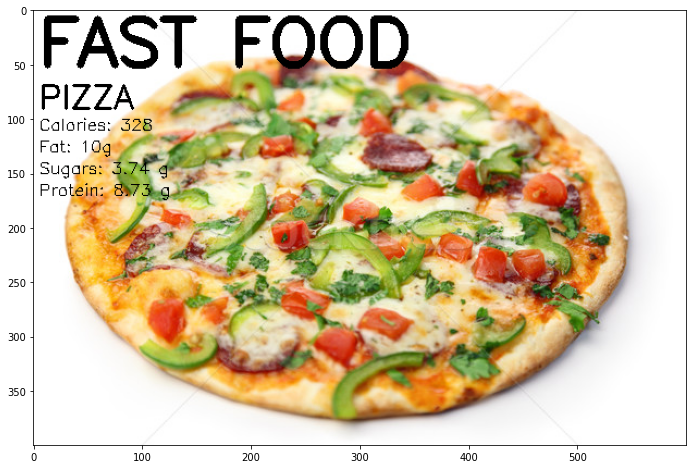

In [8]:
result = random_food_recognition()

plt.figure(figsize = (16,8))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))